In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# 1.

In [4]:
df = pd.read_csv('./04cars-data.csv')

In [5]:
df.head()

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [7]:
dff = df.iloc[:, -11:]

In [9]:
dff.head()

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [17]:
dff.shape

(387, 11)

# 2.

In [10]:
dff = (dff - dff.mean())/dff.std()

In [15]:
dff.head()

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,0.533537,0.478926,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.492267,1.098999,0.909409,0.214799
1,0.652424,0.595455,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.510681,1.098999,0.909409,0.214799
2,0.188283,0.161796,0.367351,0.162996,0.719521,-0.629504,-0.756487,1.301045,-0.171012,0.305088,1.699215
3,2.866153,2.767267,0.071585,0.162996,1.075328,-0.629504,-0.579057,-0.537472,-1.017686,-0.828013,-0.082084
4,-0.477128,-0.484865,-1.111480,-1.179122,-0.205577,0.700704,0.662958,-1.068631,-0.876574,-0.979094,-0.972733


# 3.

In [18]:
pca = PCA(11)
x = pca.fit_transform(dff)

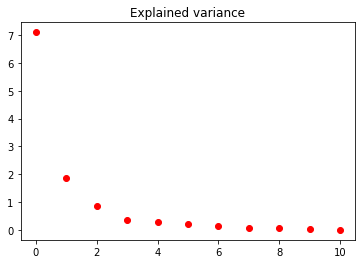

In [23]:
explained_variance = pca.explained_variance_

plt.plot(explained_variance, 'ro')
plt.title('Explained variance')
plt.show()

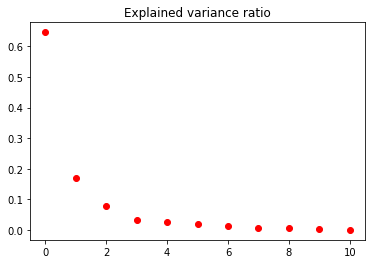

In [24]:
explained_variance_ratio_ = pca.explained_variance_ratio_

plt.plot(explained_variance_ratio_, 'ro')
plt.title('Explained variance ratio')
plt.show()

# 4.

In [35]:

attributes = dff.columns.values
k = len(attributes)
pc1 = pca.components_[0]
pc2 = pca.components_[1]

print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.4685086975025392
Dealer Cost:-0.262318638753095:0.47014658513822566
Engine Size (l):-0.3470804920252011:-0.015347186463712886
Cyl:-0.3341887576286363:0.07803201087501863
HP:-0.3186022584840291:0.29221347613918225
City MPG:0.31048172673231283:-0.0033659357616595276
Hwy MPG:0.3065886385804443:-0.010964460145349117
Weight:-0.33632936694048793:-0.16746357154787
Wheel Base:-0.2662100335710545:-0.4181771069592042
Len:-0.2567901876706825:-0.4084113806687547
Width:-0.29605459141706125:-0.3128913501625067


# 5.

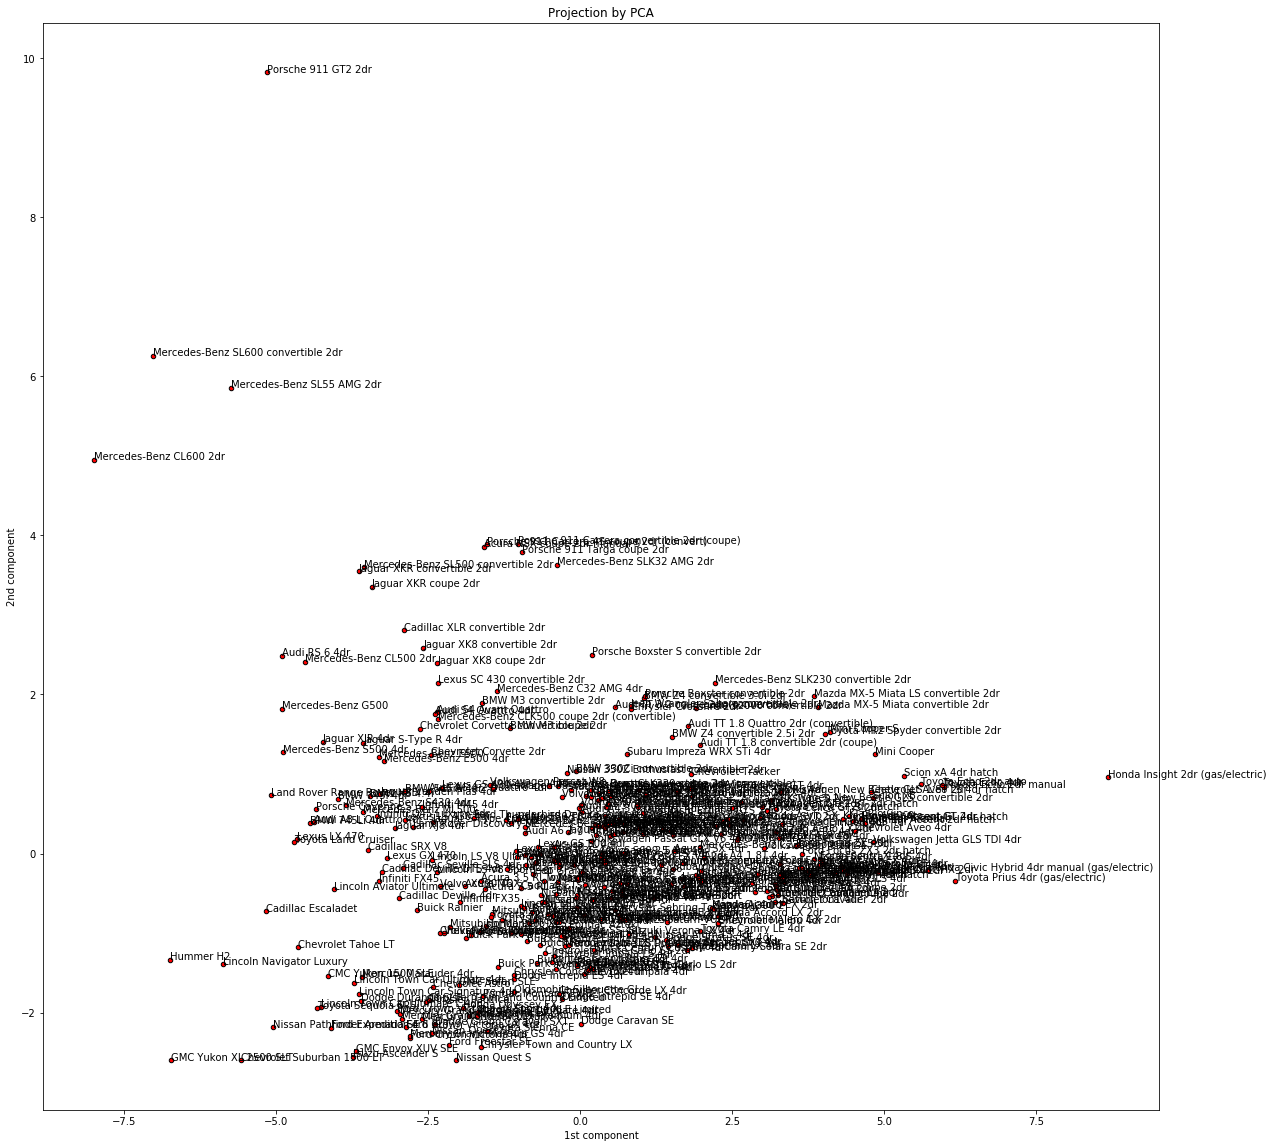

In [51]:
plt.figure(figsize=(20, 20))
plt.scatter(x[:, 0], x[:, 1], c="red", s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
for i, text in enumerate(df['Vehicle Name'].values):
    plt.annotate(text, (x[i, 0], x[i, 1]))
plt.show()

# 6.

[[-0.26375044 -0.26231864 -0.34708049 -0.33418876 -0.31860226  0.31048173
   0.30658864 -0.33632937 -0.26621003 -0.25679019 -0.29605459]
 [ 0.4685087   0.47014659 -0.01534719  0.07803201  0.29221348 -0.00336594
  -0.01096446 -0.16746357 -0.41817711 -0.40841138 -0.31289135]]


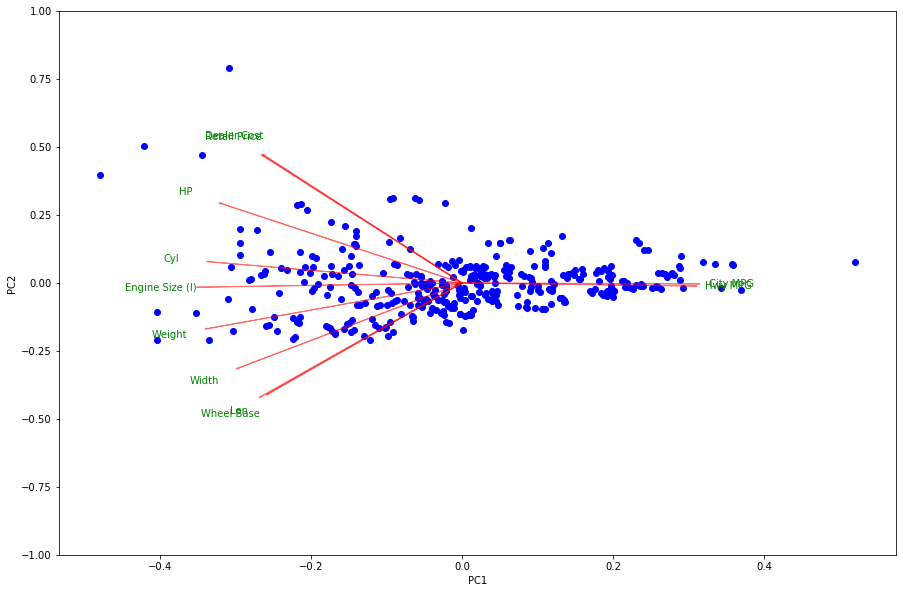

In [54]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(15,10))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'blue')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

print(pca.components_[0:2, :])
myplot(x[:,0:2],np.transpose(pca.components_[0:2, :]),attributes)
axes = plt.gca()
axes.set_ylim([-1.0,1.0])
plt.show()